In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ..

/Users/rubenbroekx/Documents/Projects/radix-co2-reduction


# Cloud Filter

Algorithm to filter out cloudy images from the sampled pixel-values. A dataset of a limited amount of annotated "cloudy vs clear" images is found under `cloud_data.json`.

In [3]:
import json
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from pathlib import Path
from collections import Counter
from sklearn.metrics import confusion_matrix, f1_score

from src.radix_co2_reduction.earth_engine.cloud_filter import CloudFilter

In [4]:
# Load the data
with open(Path.cwd() / 'data/cloud_data.json', 'r') as f:
    cloud_data = json.load(f)

data = {
    'cloudy': list(cloud_data['cloudy'].values()),
    'clear': list(cloud_data['clear'].values()),
}
len(data['cloudy']), len(data['clear'])

(38, 414)

In [5]:
# Load in the cloud filter
cloud_filter = CloudFilter(
    model_path = Path.cwd() / 'models'
)

In [6]:
# Train the classifier
cloud_filter.train(data)

In [7]:
# Get the best possible threshold value
thr = cloud_filter.calc_best_thr(data)
cloud_filter.thr = thr
print(f"Best threshold for this data:", thr)

Best threshold for this data: 0.72


In [10]:
# Show the confusion matrix of the classifier
eval_samples, true = zip(*[(s, True) for s in data['cloudy']] + [(s, False) for s in data['clear']])
preds = []
for sample in tqdm(eval_samples):
    preds.append(cloud_filter(sample))
assert len(true) == len(preds)

# Show confusion matrix
arr = confusion_matrix(true, preds, normalize='true')
plt.figure(figsize=(5, 5))
sns.heatmap(arr, annot=True, fmt=".3f", vmin=0)
title = f"Cloud Classifier (f1: {100*f1_score(true, preds):.2f}%)"
plt.title(title)
plt.xlabel("Predicted")
plt.xticks([0.5, 1.5], ['Clear', 'Cloudy'])
plt.ylabel("Actual")
plt.yticks([0.5, 1.5], ['Clear', 'Cloudy'])
plt.show()

100%|██████████| 452/452 [02:12<00:00,  3.41it/s]


TypeError: confusion_matrix() got an unexpected keyword argument 'normalise'

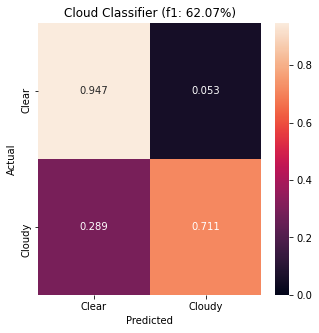

In [11]:
# Show confusion matrix
arr = confusion_matrix(true, preds, normalize='true')
plt.figure(figsize=(5, 5))
sns.heatmap(arr, annot=True, fmt=".3f", vmin=0)
title = f"Cloud Classifier (f1: {100*f1_score(true, preds):.2f}%)"
plt.title(title)
plt.xlabel("Predicted")
plt.xticks([0.5, 1.5], ['Clear', 'Cloudy'])
plt.ylabel("Actual")
plt.yticks([0.5, 1.5], ['Clear', 'Cloudy'])
plt.show()

In [12]:
# Save the classifier
cloud_filter.save()

Saved cloud-filter!
